<a href="https://colab.research.google.com/github/a-forty-two/EY_batch8_11Nov_AIplusOpenAI/blob/main/11Nov_006_EDA_Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Data Science & Analysis
Exploratory Data Analysis & Visualization

# What is EDA?

## What is Exploratory Data Analysis?

* goal:
    * investigate
    * explain
    * describe
    * understand

* questions?
    * is there enough data?
    * is the data correct?
    * what is the distribution of each column?
    * how do the columns correlate?

* method
    * visual
    * primarily descriptive

## What are the tools for EDA in Python?

Simple pair: Pandas for data exploration, seaborn for visualization.


...but lots of options.

## What are the challenges around EDA?

### Challenges of EDA:

* Strategic
* Organizational
* Technical

## Objectives
* write a program which uses seaborn to:
    * show univariate plots (eg., distplot)
    * show multivariate plots (eg., scatterplot)
    * EXTRA: customize plots

# Part 3: Visualization

## How do I use pandas to plot?

Pandas has a `.plot` which you configure using its arguments (eg., `kind=hist`), this however *just uses* seaborn.

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('car data.csv')
data.sample(2)

# did not find any missing values.
# have torque in nm at rpm.
# engine having 1197 with CC unit text.
# max_power with bhp unit text.
# max_torque with nm unit text.
# we can also see petrol, diesel, cng, lpg in fuel_type.

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
67,fortuner,2010,9.25,20.45,59000,Diesel,Dealer,Manual,0
71,corolla altis,2011,4.50,12.48,45000,Diesel,Dealer,Manual,0


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#Create a pie chart presenting the male/female proportion

In [5]:

data.columns


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Krishna.Kompella\AppData\Local\Temp\ipykernel_19788\550285355.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace =True)
C:\Users\Krishna.Kompella\AppData\Local\Temp\ipykernel_19788\550285355.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace =True)
C:\Users\Krishna.Kompella\AppData\Local\Temp\ipykernel_19788\550285355.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and 

<Axes: >

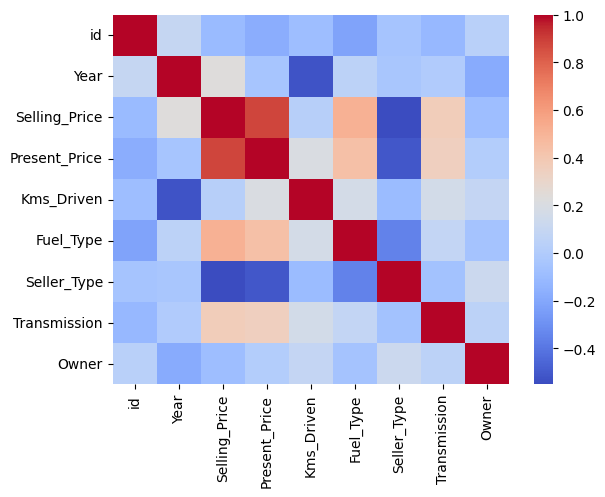

In [7]:
import seaborn as sns

data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace =True)
data.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace =True)
data.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace =True)
data['id'] = data['Car_Name'].factorize()[0]

input_cols = ['id','Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',"Fuel_Type","Seller_Type","Transmission",
        'Owner']
considered_data = data.loc[ :, input_cols]
sns.heatmap(considered_data.corr(), cmap='coolwarm')

# we can see that Present_Price and Selling_Price are highly correlated.

In [8]:
Y = data['Selling_Price']
X = data.iloc[:, 1:]
# ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
#        'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

In [9]:
X.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,id
0,2014,3.35,5.59,27000,0,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0,1
2,2017,7.25,9.85,6900,0,0,0,0,2
3,2011,2.85,4.15,5200,0,0,0,0,3
4,2014,4.60,6.87,42450,1,0,0,0,4


In [11]:
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [ ]:

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

ModuleNotFoundError: No module named 'sklearn'

In [35]:
X.head()



,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,id
0,2014,3.35,5.59,27000,0,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0,1
2,2017,7.25,9.85,6900,0,0,0,0,2
3,2011,2.85,4.15,5200,0,0,0,0,3
4,2014,4.60,6.87,42450,1,0,0,0,4


Often pandas doesn't choose the right plot, or the right dataseries... therefore it's often easier to go straight to using seaborn.

## How do I use seaborn to visualize data?

### Checks for emptiness and cleanse data

In [ ]:
ti.isna().sum() #check for emptiness

In [ ]:
#replace NaNs in numerical fields with the mean values
import numpy as np
# Select only numeric columns for mean calculation
numeric_cols = ti.select_dtypes(include=np.number).columns

# Calculate the mean for numeric columns only
ti[numeric_cols] = ti[numeric_cols].fillna(ti[numeric_cols].mean())

In [ ]:
# fill every column with its own most frequent value
ti = ti.apply(lambda x:x.fillna(x.value_counts().index[0]))

There are two ways of using seaborn, you can either

* supply x (, y, etc.) as individual arguments
* OR: supply a *dataframe* and name the relevant columns

In [ ]:
sns.distplot(ti['age'], kde=False);


##### What is the kde?

* approximation of the distribution using a linear combination of normal distributions

* further reading: https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation

In [ ]:
sns.lineplot(x='age', y='fare', data=ti)

## How do I use a dataframe with seaborn?

We set `data` to be the dataframe, and *name the columns* for `x` and `y`...

In [ ]:
sns.scatterplot(data=ti, x='age', y='fare')


## How do I create a distribution plot?

In [ ]:
sns.distplot(ti['survived'], vertical=True, kde=False)


## How do I create a violin plot?

The width of a violin plot is the frequency (ie., how common) a value is within some column...

In [ ]:
sns.violinplot(ti['age'])


## How do I create a box plot?

Box plots show quarties (25th, 50th, 75th) and outliers.

In [ ]:
sns.boxplot(ti['age'])


## How do I create a violin plot for multiple columns?

A violin plot can show multiple distributions, each a subset of a single column, factored (or grouped) by another.

In [ ]:
sns.violinplot(data=ti, x='survived', y='age')


In [ ]:
sns.violinplot(data=ti, x="age", y='embark_town')

## How do I create a bar plor for multiple columns?

Bar plots are useful for discrete data or for showing, here, the means:

In [ ]:
sns.barplot(data=ti, x='survived', y='age');


## How do I create a line plot?

In [ ]:
sns.lineplot(data=ti, x='fare', y='age');


###### NB: would creating a scatter plot be more appropriate?

## How do I create a scatter plot?

In [ ]:
sns.scatterplot(data=ti, x='fare', y='age');


In [ ]:
sns.scatterplot(data=ti, x='fare', y='age',
                hue = 'sex',
                size = 'pclass');

### EXTRA: Tips
* Often for the sake of communication, using excel is both faster and leads to better visuals
* use `df.to_csv()` to save the data behind a visual
* use excel to heavily customize the layout (and then, eg., copy powerpoint)

# Python for Data Science & Analysis
## Plotly

## How do you install plotly?

You can install plotly with `pip` (python package installer).

In [ ]:
!pip install plotly


## How do I import plotly?

In [ ]:
import plotly.express as px


## Plotly

In [ ]:
import pandas as pd

ti = pd.read_csv("https://raw.githubusercontent.com/a-forty-two/EY_batch8_11Nov_AIplusOpenAI/refs/heads/main/titanic.csv")

In [ ]:
px.histogram(ti, x='age')

In [ ]:
px.scatter(ti, x='age', y='survived', color='class', size='fare')

## Exercise (30 min)- optional

## Step 1 (5 min)
* review seaborn individual, try a few plots

## Step 2 (25 min)

* What affected your chances of survival on the titanic?
    * brainstorm & execute an analysis of the titanic dataset
* Consider:
    * old vs. young
    * women vs. men
    * women & children vs. men
    * cheaper vs. expensive tickets
    * deck
    * class
    * ...location...
* Use seaborn plots (and pandas) to obtain helpful visuals which answer the investigatory question.

### Consider:
* Univariate (single-col) plots
    * sns.distplot
        * of survived
    * sns.violinplot
        * of fare
    * sns.boxplot
        * of age

* Multivariate (here: 2-col) plots
    * sns.violinplot
        * age by survived
        * fare by survived
    * sns.lineplot
        * fare vs. age
    * sns.scatterplot
        * age vs. fare

ti[["age","sex"]].groupby(ti.age>18).sum()